# Introduction

In this project a fake advertising data set is used, indicating whether or not a particular internet user clicked on an Advertisement. The goal is to create a model that will predict whether or not they will click on an ad based off the features of that user.<br>

This data set contains the following features:

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Importing libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

In [77]:
import matplotlib.pyplot as plt
#matplotlib inline
sns.set_style('whitegrid')

# Readng csv found on Kaggle: 
source: https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download&select=Advertising.csv

In [78]:
ad_data = pd.read_csv('advertising.csv')

# Exploring data/ feature engineering

In [79]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [80]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [81]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**Checking for missing data**

<AxesSubplot:>

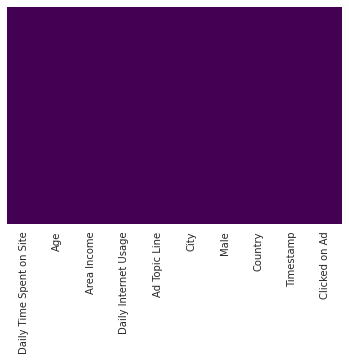

In [82]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Plotting age distribution**

<AxesSubplot:xlabel='Age', ylabel='Count'>

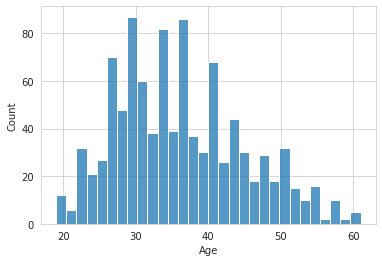

In [83]:
sns.histplot(ad_data['Age'],bins=30)

**Plotting area income vs age**

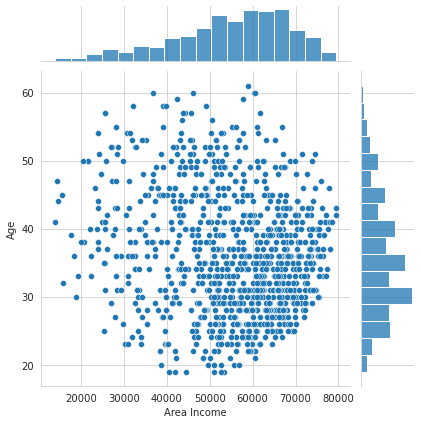

In [84]:
sns.jointplot(data=ad_data,x='Area Income',y='Age')

**Plotting dailiy time spent on site vs age**

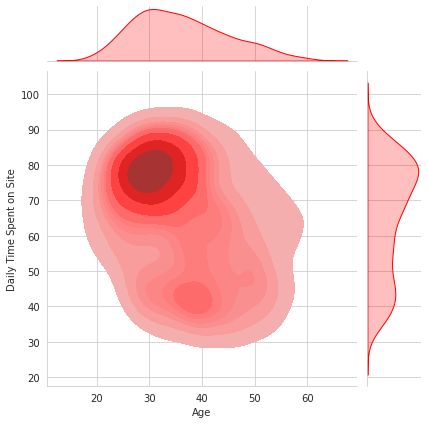

In [85]:
sns.jointplot(data=ad_data,y='Daily Time Spent on Site',x='Age',kind='kde',fill=True,color='red')

**Plotting dailiy time spent on site vs daily internet usage**

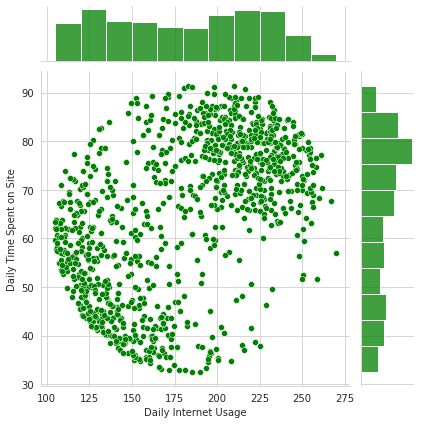

In [86]:
sns.jointplot(data=ad_data,y='Daily Time Spent on Site',x='Daily Internet Usage',color='green')

**Plotting all colummns containing numerical data pairwise to check despendencies in regards to 'clicked on ad' column**

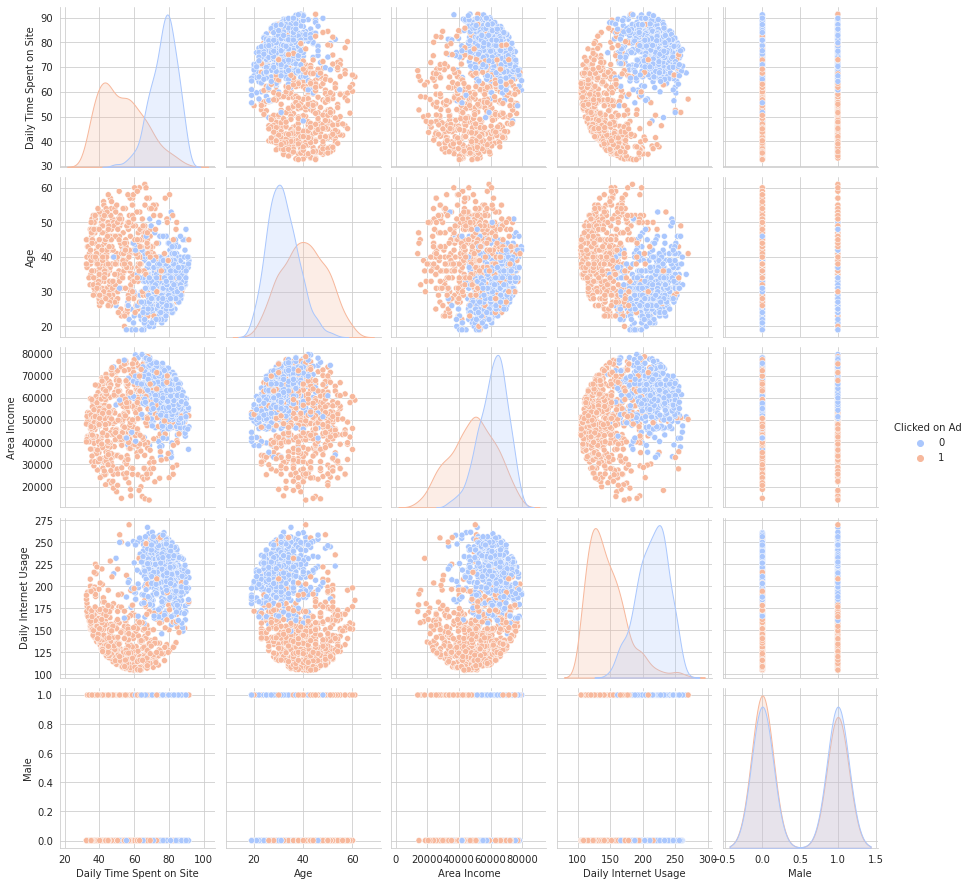

In [87]:
sns.pairplot(data=ad_data,hue='Clicked on Ad',palette='coolwarm')

## Checking for columns that can be used as predictors for regression

**Checking if 'Ad Topic Line' column contains information usable for regression <br>
Checking how many diffrent topics are there**

In [88]:
ad_data.groupby(['Ad Topic Line'])['Ad Topic Line'].count()

Ad Topic Line
Adaptive 24hour Graphic Interface          1
Adaptive asynchronous attitude             1
Adaptive context-sensitive application     1
Adaptive contextually-based methodology    1
Adaptive demand-driven knowledgebase       1
                                          ..
Visionary client-driven installation       1
Visionary maximized process improvement    1
Visionary mission-critical application     1
Visionary multi-tasking alliance           1
Visionary reciprocal circuit               1
Name: Ad Topic Line, Length: 1000, dtype: int64

**=> Every entry diffrent topic**

Splitting topic strings in words to check for repeating words, 3 words is max.

In [89]:
ad_data['Split [0]'] = ad_data['Ad Topic Line'].apply(lambda x:x.split()[0])
ad_data['Split [1]'] = ad_data['Ad Topic Line'].apply(lambda x:x.split()[1])
ad_data['Split [2]'] = ad_data['Ad Topic Line'].apply(lambda x:x.split()[2])

**Plotting 3 words in subplots**

Text(0.5, 1.0, 'Split [2]')

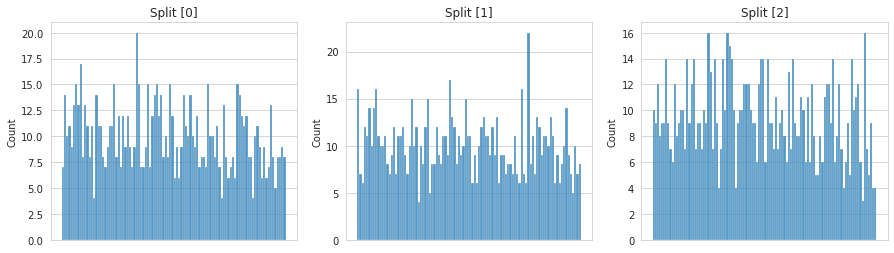

In [90]:
fig, axes = plt.subplots(1, 3,figsize=(15, 4))
plt.setp(axes, xticks=[])
sns.histplot(data=ad_data,x='Split [0]',ax=axes[0])
sns.histplot(data=ad_data,x='Split [1]',ax=axes[1])
sns.histplot(data=ad_data,x='Split [2]',ax=axes[2])
axes[0].set_title('Split [0]')
axes[1].set_title('Split [1]')
axes[2].set_title('Split [2]')

**=> No pattern can be recognized, 'Ad Topic Line' column will not be used for regression**

**Removing split columns from ad_data**

In [91]:
ad_data.drop(['Split [0]','Split [1]','Split [2]'],axis=1,inplace=True)

**Checking if 'City' column contains information usable for regression**

/tmp/ipykernel_70/2207480897.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


([], [])

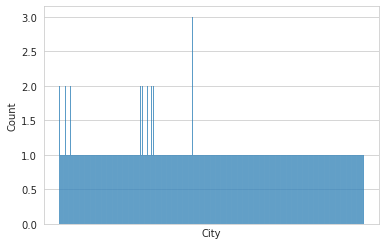

In [92]:
sns.histplot(data=ad_data,x='City')
plt.xticks([])

**=> No pattern can be recognized, 'City' column will not be used for regression**

**Checking if 'Country' column contains information usable for regression**

/tmp/ipykernel_70/2323083136.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


([], [])

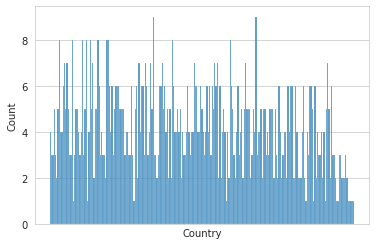

In [93]:
sns.histplot(data=ad_data,x='Country')
plt.xticks([])
#>>>No pattern can be recognized, 'Country' column will not be used for regression

**Checking if 'Timestamp' column contains information usable for regression <br>
Converting stings to datetime type**

In [94]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

**Splitting timestamp into days, weeks and hours and adding to ad_data as columns**

In [95]:
ad_data['Day of Week'] = ad_data['Timestamp'].apply(lambda time: time.day_of_week)
ad_data['Hour'] = ad_data['Timestamp'].apply(lambda time: time.hour)
ad_data['Month'] = ad_data['Timestamp'].apply(lambda time: time.month)

**Checking data head**

In [96]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Day of Week,Hour,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,6,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,1,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,6,20,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,6,2,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,4,3,6


**Checking for patterns using countplot regadring wether clicked on ad**

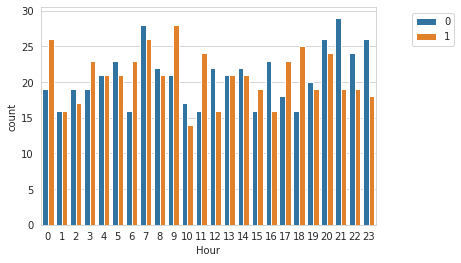

In [97]:
cp = sns.countplot(x='Hour',hue='Clicked on Ad',data=ad_data)
cp.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)

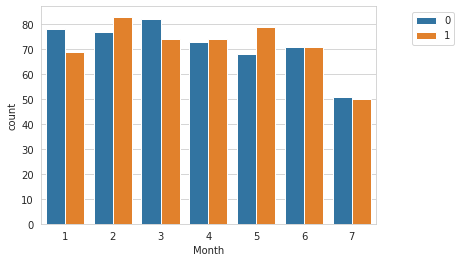

In [98]:
cp = sns.countplot(x='Month',hue='Clicked on Ad',data=ad_data)
cp.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)

7

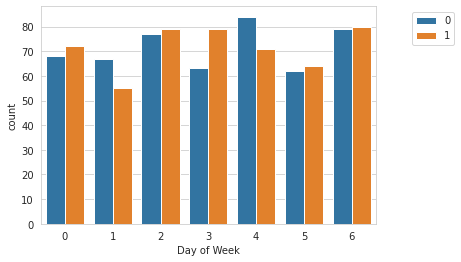

In [99]:
cp = sns.countplot(x='Day of Week',hue='Clicked on Ad',data=ad_data)
cp.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)
ad_data['Month'].max()

**=> No patters can be found, only 7 months available. No useful patterns for predictions found**

**Removing all columns found not useful for regression**

In [100]:
ad_data.drop(['Timestamp','Day of Week','Hour','Month','Ad Topic Line','City','Country'],axis=1,inplace=True)

# Regression

## Creating Model

**Importing sklearn and Logistic Reression**

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Splitting data into train and test sets**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

**Fitting data**

In [103]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Calculating Predictions

In [104]:
predictions = logmodel.predict(X_test)

## Evaluating Model

**Importing classification report**

In [105]:
from sklearn.metrics import classification_report

**Printing results**

In [106]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



**The model scores relatively above 90% in all measures for both classes which is quite good, but not excellent**